In [1]:
import os
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

In [2]:
#for ssl problem
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def remove_stopwords(text):
    # Türkçe stop kelimeleri yükleyin
    stop_words = set(stopwords.words('turkish'))

    # Metni tokenize edin
    word_tokens = word_tokenize(text, language='turkish')

    # Stop kelimeleri temizleyin
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

    # Temizlenmiş metni birleştirin
    cleaned_text = ' '.join(filtered_text)
    #print("cleaned_text: ", cleaned_text)
    return cleaned_text

In [ ]:
data = []
label = []
import re
def get_txt(file_path,real_or_fake):
    func_data = []
    func_label = []
    for filename in os.listdir(file_path):
        #print(filename)
        if(filename.endswith('.txt')):
            with open(file_path+"/"+filename, 'r', encoding= 'utf-8' ) as file:
            #text clearing
                text = file.read()
                text = re.sub(r'[^\w\s\']', ' ', text)
                text = re.sub(r'[ \n]+', ' ', text)
                text = text.strip().lower()

                #stop wordsleri temizleme 1272770 -> 1138016
                clean_text = remove_stopwords(text)
                data.append(clean_text)
                func_data.append(clean_text)
                if real_or_fake == 'real':
                    label.append(1)
                    func_label.append(1)
                else:
                    label.append(0)
                    func_label.append(0)
    return func_data, func_label

X_train_val_real, y_train_val_real = get_txt("/content/drive/My Drive/collab1/DOSYALAR/SON_DATASET/random10_90(960-8756)/90-train/real",'real')
X_train_val_fake, y_train_val_fake = get_txt("/content/drive/My Drive/collab1/DOSYALAR/SON_DATASET/random10_90(960-8756)/90-train/fake",'fake')


#print(len(X_train_val_real),len(y_train_val_real))
#print(len(X_train_val_fake),len(y_train_val_fake))

X_train_val_combined = X_train_val_real + X_train_val_fake
y_train_val_combined = y_train_val_real + y_train_val_fake

#print()
#print(len(X_train_val_combined))
#print(len(y_train_val_combined))


X_test_val_real, y_test_val_real = get_txt("/content/drive/My Drive/collab1/DOSYALAR/SON_DATASET/random10_90(960-8756)/10-test/real",'real')
X_test_val_fake, y_test_val_fake = get_txt("/content/drive/My Drive/collab1/DOSYALAR/SON_DATASET/random10_90(960-8756)/10-test/fake",'fake')

#print(len(X_test_val_real),len(y_test_val_real))
#print(len(X_test_val_fake),len(y_test_val_fake))

X_test_val_combined = X_test_val_real + X_test_val_fake
y_test_val_combined = y_test_val_real + y_test_val_fake

#print(len(X_test_val_combined),len(y_train_val_combined))


#shuffle train
X_train_val_combined = np.array(X_train_val_combined)
y_train_val_combined = np.array(y_train_val_combined)
indices = np.random.permutation(len(X_train_val_combined))
X_train_val_combined = X_train_val_combined[indices]
y_train_val_combined = y_train_val_combined[indices]


#shuffle test
X_test_val_combined = np.array(X_test_val_combined)
y_test_val_combined = np.array(y_test_val_combined)
indices2 =  np.random.permutation(len(X_test_val_combined))
X_test_val_combined = X_test_val_combined[indices2]
y_test_val_combined = y_test_val_combined[indices2]


print(len(X_train_val_combined),len(y_train_val_combined))
print(len(X_test_val_combined),len(y_test_val_combined))

8756 8756
960 960


8756 960


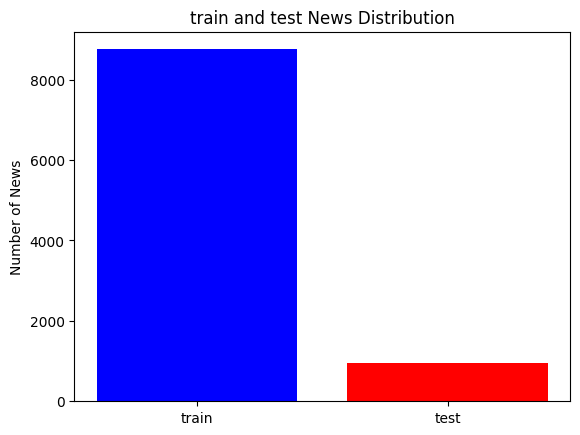

In [ ]:
#plot
import matplotlib.pyplot as plt
real_new_count = len(X_train_val_combined)
fake_new_count = len(X_test_val_combined)
print(real_new_count, fake_new_count)

#create the bar plot
plt.bar(['train', 'test'], [real_new_count, fake_new_count], color = ['blue', 'red'])
plt.title('train and test News Distribution')
plt.ylabel('Number of News')

plt.show()

In [ ]:
X_train = X_train_val_combined
X_test = X_test_val_combined
y_train = y_train_val_combined
y_test = y_test_val_combined


X_train = np.array(X_train)
X_test = np.array(X_test)

if((len(X_train) == len(y_train)) and (len(X_test) == len(y_test))):
  print("esit!" + "train->" +str(len(X_train_val_combined)) + " " + "test ->" + str(len(y_test_val_combined)) )

#esit!train->8756 test ->960


esit!train->8756 test ->960


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
import tensorflow
from tensorflow import keras
import gc
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
#1. Word Frequency Text Vectorization

#count -> Kelime hazinesindeki kelime konumunda kayan nokta listesindeki kelime sıklığını döndürür.
text_vectorizer = keras.layers.TextVectorization(max_tokens=50000, standardize="lower_and_strip_punctuation",
                                                 split="whitespace", output_mode="count", pad_to_max_tokens=True)

text_vectorizer.adapt(np.concatenate((X_train, X_val)), batch_size=512)
#gc.collect()


vocab = text_vectorizer.get_vocabulary()
print("Vocab : {}".format(vocab[:10]))
print("Vocab Size : {}".format(text_vectorizer.vocabulary_size()))
#out = text_vectorizer(X_train[:5])
#print("Output Shape : {}".format(out.shape))

Vocab : ['[UNK]', 'bir', 'olarak', 'olan', 'kadar', 'sonra', 'son', 'var', 'ardından', 'a']
Vocab Size : 50000


In [ ]:
def create_model(text_vectorizer):
    return Sequential([
                        layers.Input(shape=(1,), dtype="string"),
                        text_vectorizer,
                        layers.Dense(128, activation="relu"),
                        layers.Dropout(0.5),
                        layers.Dense(64, activation="relu"),
                        layers.Dropout(0.5),
                        layers.Dense(2, activation="softmax"),
                    ])

In [ ]:
model = create_model(text_vectorizer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 50000)             0         
 ctorization)                                                    
                                                                 
 dense_3 (Dense)             (None, 128)               6400128   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                      

In [ ]:
model.compile("adam", "binary_crossentropy ", metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
history = model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_val, y_val),callbacks=[early_stopping])
#gc.collect()

'''
Epoch 1/10
28/28 [==============================] - 13s 428ms/step - loss: 0.2267 - accuracy: 0.9145 - val_loss: 0.0823 - val_accuracy: 0.9823
Epoch 2/10
28/28 [==============================] - 9s 339ms/step - loss: 0.0165 - accuracy: 0.9999 - val_loss: 0.0765 - val_accuracy: 0.9800
Epoch 3/10
28/28 [==============================] - 7s 254ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.0644 - val_accuracy: 0.9829
Epoch 4/10
28/28 [==============================] - 9s 341ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0606 - val_accuracy: 0.9874
Epoch 5/10
28/28 [==============================] - 8s 273ms/step - loss: 7.3914e-04 - accuracy: 1.0000 - val_loss: 0.0804 - val_accuracy: 0.9806
Epoch 6/10
28/28 [==============================] - 10s 366ms/step - loss: 4.3947e-04 - accuracy: 1.0000 - val_loss: 0.1000 - val_accuracy: 0.9749
Epoch 7/10
28/28 [==============================] - 8s 276ms/step - loss: 2.9833e-04 - accuracy: 1.0000 - val_loss: 0.1110 - val_accuracy: 0.9737
Epoch 8/10
28/28 [==============================] - 9s 340ms/step - loss: 2.1808e-04 - accuracy: 1.0000 - val_loss: 0.1205 - val_accuracy: 0.9732
Epoch 9/10
28/28 [==============================] - 10s 330ms/step - loss: 1.6759e-04 - accuracy: 1.0000 - val_loss: 0.1286 - val_accuracy: 0.9726
Epoch 10/10
28/28 [==============================] - 8s 274ms/step - loss: 1.3158e-04 - accuracy: 1.0000 - val_loss: 0.1342 - val_accuracy: 0.9715

'''

Epoch 1/10
28/28 [==============================] - 11s 382ms/step - loss: 0.3632 - accuracy: 0.8492 - val_loss: 0.1076 - val_accuracy: 0.9823
Epoch 2/10
28/28 [==============================] - 11s 396ms/step - loss: 0.0720 - accuracy: 0.9900 - val_loss: 0.0533 - val_accuracy: 0.9846
Epoch 3/10
28/28 [==============================] - 7s 256ms/step - loss: 0.0179 - accuracy: 0.9979 - val_loss: 0.0389 - val_accuracy: 0.9857
Epoch 4/10
28/28 [==============================] - 10s 344ms/step - loss: 0.0063 - accuracy: 0.9994 - val_loss: 0.0355 - val_accuracy: 0.9863
Epoch 5/10
28/28 [==============================] - 8s 279ms/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.0357 - val_accuracy: 0.9869
Epoch 6/10
28/28 [==============================] - 10s 367ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0359 - val_accuracy: 0.9886
Epoch 7/10
28/28 [==============================] - 8s 279ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.0415 - val_accuracy: 0.9892


'\nEpoch 1/10\n28/28 [==============================] - 13s 428ms/step - loss: 0.2267 - accuracy: 0.9145 - val_loss: 0.0823 - val_accuracy: 0.9823\nEpoch 2/10\n28/28 [==============================] - 9s 339ms/step - loss: 0.0165 - accuracy: 0.9999 - val_loss: 0.0765 - val_accuracy: 0.9800\nEpoch 3/10\n28/28 [==============================] - 7s 254ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.0644 - val_accuracy: 0.9829\nEpoch 4/10\n28/28 [==============================] - 9s 341ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0606 - val_accuracy: 0.9874\nEpoch 5/10\n28/28 [==============================] - 8s 273ms/step - loss: 7.3914e-04 - accuracy: 1.0000 - val_loss: 0.0804 - val_accuracy: 0.9806\nEpoch 6/10\n28/28 [==============================] - 10s 366ms/step - loss: 4.3947e-04 - accuracy: 1.0000 - val_loss: 0.1000 - val_accuracy: 0.9749\nEpoch 7/10\n28/28 [==============================] - 8s 276ms/step - loss: 2.9833e-04 - accuracy: 1.0000 - val_loss: 0.1110

In [ ]:
# Modeli değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)

from sklearn.metrics import accuracy_score
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
'''
Train Accuracy : 1.0
Test  Accuracy : 0.975
'''

print("Train Accuracy : {}".format(accuracy_score(y_train, np.argmax(train_preds, axis=1))))
print("Test  Accuracy : {}".format(accuracy_score(y_test, np.argmax(test_preds, axis=1))))

30/30 [==============================] - 1s 25ms/step
Train Accuracy : 1.0
Test  Accuracy : 0.9927083333333333


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Predict probabilities on test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob[:, 1] > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)
'''
Confusion Matrix:
[[454   2]
 [ 22 482]]
'''

30/30 [==============================] - 1s 16ms/step
Confusion Matrix:
[[450   6]
 [  1 503]]


'\nConfusion Matrix:\n[[454   2]\n [ 22 482]]\n'

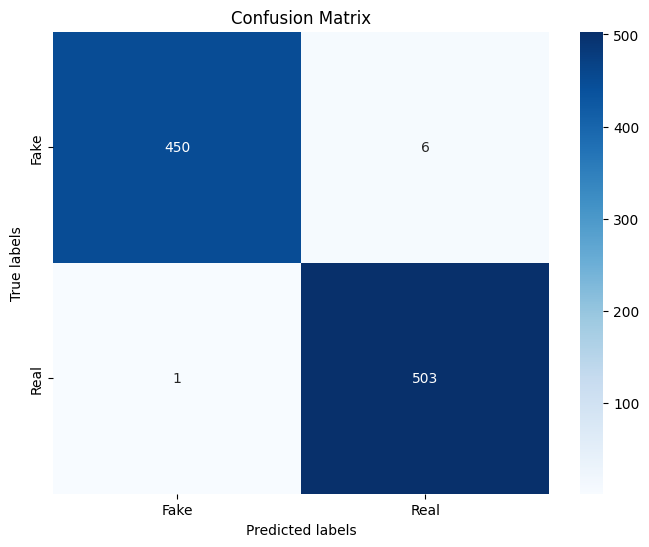

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_binary, target_names=['Fake', 'Real'])

print(report)
'''
             precision    recall  f1-score   support

        Fake       0.95      1.00      0.97       456
        Real       1.00      0.96      0.98       504

    accuracy                           0.97       960
   macro avg       0.97      0.98      0.97       960
weighted avg       0.98      0.97      0.98       960
'''

30/30 [==============================] - 1s 27ms/step
              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99       456
        Real       0.99      1.00      0.99       504

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960



'\n             precision    recall  f1-score   support\n\n        Fake       0.95      1.00      0.97       456\n        Real       1.00      0.96      0.98       504\n\n    accuracy                           0.97       960\n   macro avg       0.97      0.98      0.97       960\nweighted avg       0.98      0.97      0.98       960\n'

In [ ]:
#2. Tf-Idf Text Vectorization
#tf-idf -> Kelimelerin TF-IDF (Terim Frekansı-Ters Belge Frekansı) değerlerini döndürür.
text_vectorizer = keras.layers.TextVectorization(max_tokens=50000, standardize="lower_and_strip_punctuation",
                                                 split="whitespace", output_mode="tf_idf", pad_to_max_tokens=True)

text_vectorizer.adapt(np.concatenate((X_train, X_val)), batch_size=512)

model = create_model(text_vectorizer)
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_val, y_val),callbacks=[early_stopping])

'''
Epoch 1/10
28/28 [==============================] - 11s 334ms/step - loss: 0.2099 - accuracy: 0.9146 - val_loss: 0.0956 - val_accuracy: 0.9789
Epoch 2/10
28/28 [==============================] - 11s 393ms/step - loss: 0.0129 - accuracy: 0.9994 - val_loss: 0.1299 - val_accuracy: 0.9732
Epoch 3/10
28/28 [==============================] - 8s 270ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1492 - val_accuracy: 0.9675
Epoch 4/10
28/28 [==============================] - 9s 320ms/step - loss: 6.0800e-04 - accuracy: 1.0000 - val_loss: 0.1469 - val_accuracy: 0.9697
Epoch 5/10
28/28 [==============================] - 8s 273ms/step - loss: 3.8606e-04 - accuracy: 1.0000 - val_loss: 0.1706 - val_accuracy: 0.9675
Epoch 6/10
28/28 [==============================] - 9s 339ms/step - loss: 2.9365e-04 - accuracy: 1.0000 - val_loss: 0.2086 - val_accuracy: 0.9658
Epoch 7/10
28/28 [==============================] - 8s 299ms/step - loss: 2.4130e-04 - accuracy: 1.0000 - val_loss: 0.2374 - val_accuracy: 0.9629
Epoch 8/10
28/28 [==============================] - 9s 289ms/step - loss: 2.0807e-04 - accuracy: 1.0000 - val_loss: 0.2569 - val_accuracy: 0.9623
Epoch 9/10
28/28 [==============================] - 10s 344ms/step - loss: 1.8374e-04 - accuracy: 1.0000 - val_loss: 0.2779 - val_accuracy: 0.9612
Epoch 10/10
28/28 [==============================] - 7s 263ms/step - loss: 1.6471e-04 - accuracy: 1.0000 - val_loss: 0.2979 - val_accuracy: 0.9583

'''

Epoch 1/10
28/28 [==============================] - 10s 314ms/step - loss: 0.4004 - accuracy: 0.8155 - val_loss: 0.1295 - val_accuracy: 0.9783
Epoch 2/10
28/28 [==============================] - 11s 394ms/step - loss: 0.0901 - accuracy: 0.9819 - val_loss: 0.0599 - val_accuracy: 0.9863
Epoch 3/10
28/28 [==============================] - 10s 364ms/step - loss: 0.0324 - accuracy: 0.9960 - val_loss: 0.0470 - val_accuracy: 0.9886
Epoch 4/10
28/28 [==============================] - 9s 313ms/step - loss: 0.0143 - accuracy: 0.9976 - val_loss: 0.0428 - val_accuracy: 0.9897
Epoch 5/10
28/28 [==============================] - 11s 386ms/step - loss: 0.0094 - accuracy: 0.9986 - val_loss: 0.0476 - val_accuracy: 0.9863
Epoch 6/10
28/28 [==============================] - 9s 309ms/step - loss: 0.0033 - accuracy: 0.9999 - val_loss: 0.0467 - val_accuracy: 0.9874
Epoch 7/10
28/28 [==============================] - 10s 360ms/step - loss: 0.0051 - accuracy: 0.9994 - val_loss: 0.0558 - val_accuracy: 0.9857


'\nEpoch 1/10\n28/28 [==============================] - 11s 334ms/step - loss: 0.2099 - accuracy: 0.9146 - val_loss: 0.0956 - val_accuracy: 0.9789\nEpoch 2/10\n28/28 [==============================] - 11s 393ms/step - loss: 0.0129 - accuracy: 0.9994 - val_loss: 0.1299 - val_accuracy: 0.9732\nEpoch 3/10\n28/28 [==============================] - 8s 270ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1492 - val_accuracy: 0.9675\nEpoch 4/10\n28/28 [==============================] - 9s 320ms/step - loss: 6.0800e-04 - accuracy: 1.0000 - val_loss: 0.1469 - val_accuracy: 0.9697\nEpoch 5/10\n28/28 [==============================] - 8s 273ms/step - loss: 3.8606e-04 - accuracy: 1.0000 - val_loss: 0.1706 - val_accuracy: 0.9675\nEpoch 6/10\n28/28 [==============================] - 9s 339ms/step - loss: 2.9365e-04 - accuracy: 1.0000 - val_loss: 0.2086 - val_accuracy: 0.9658\nEpoch 7/10\n28/28 [==============================] - 8s 299ms/step - loss: 2.4130e-04 - accuracy: 1.0000 - val_loss: 0.

30/30 [==============================] - 1s 21ms/step


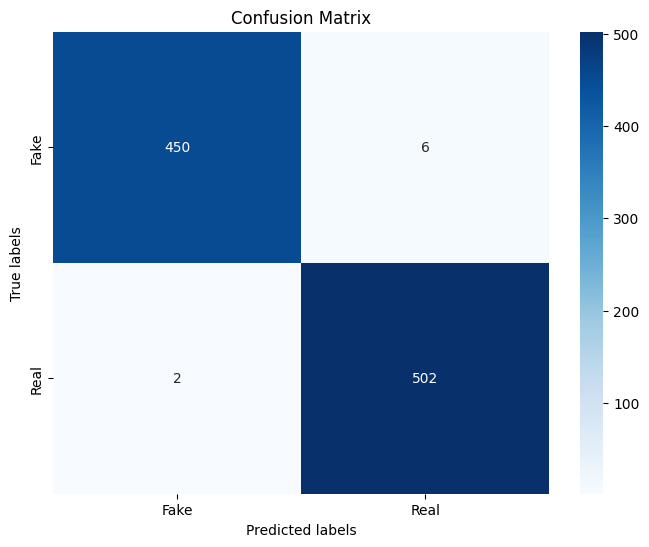

In [ ]:
# Predict probabilities on test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob[:, 1] > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred_binary, target_names=['Fake', 'Real'])

print(report)

'''
              precision    recall  f1-score   support

        Fake       0.93      1.00      0.96       456
        Real       1.00      0.93      0.96       504

    accuracy                           0.96       960
   macro avg       0.96      0.96      0.96       960
weighted avg       0.96      0.96      0.96       960
'''

30/30 [==============================] - 1s 17ms/step
              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99       456
        Real       0.99      1.00      0.99       504

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960



'\n              precision    recall  f1-score   support\n\n        Fake       0.93      1.00      0.96       456\n        Real       1.00      0.93      0.96       504\n\n    accuracy                           0.96       960\n   macro avg       0.96      0.96      0.96       960\nweighted avg       0.96      0.96      0.96       960\n'

In [ ]:
#3. Multi-Hot Text Vectorization
#Multi-Hot -> Dokümanda bir kelime mevcutsa 1 değerini döndürür, aksi takdirde kelime dağarcığında kelime konumundaki kelimeler listesinde 0 olur.
text_vectorizer = keras.layers.TextVectorization(max_tokens=50000, standardize="lower_and_strip_punctuation",
                                                 split="whitespace", output_mode="multi_hot",
                                                 pad_to_max_tokens=True)

text_vectorizer.adapt(np.concatenate((X_train, X_test)), batch_size=512)
model = create_model(text_vectorizer)
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_val, y_val),callbacks=[early_stopping])

'''
Epoch 1/10
28/28 [==============================] - 14s 438ms/step - loss: 0.2304 - accuracy: 0.9196 - val_loss: 0.0688 - val_accuracy: 0.9880
Epoch 2/10
28/28 [==============================] - 8s 278ms/step - loss: 0.0150 - accuracy: 0.9994 - val_loss: 0.0575 - val_accuracy: 0.9823
Epoch 3/10
28/28 [==============================] - 8s 291ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 0.9789
Epoch 4/10
28/28 [==============================] - 9s 308ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9777
Epoch 5/10
28/28 [==============================] - 8s 278ms/step - loss: 7.4905e-04 - accuracy: 1.0000 - val_loss: 0.0855 - val_accuracy: 0.9766
Epoch 6/10
28/28 [==============================] - 11s 392ms/step - loss: 5.1599e-04 - accuracy: 1.0000 - val_loss: 0.0909 - val_accuracy: 0.9766
Epoch 7/10
28/28 [==============================] - 7s 258ms/step - loss: 3.8070e-04 - accuracy: 1.0000 - val_loss: 0.0947 - val_accuracy: 0.9766
Epoch 8/10
28/28 [==============================] - 10s 348ms/step - loss: 2.9440e-04 - accuracy: 1.0000 - val_loss: 0.0982 - val_accuracy: 0.9766
Epoch 9/10
28/28 [==============================] - 8s 274ms/step - loss: 2.3655e-04 - accuracy: 1.0000 - val_loss: 0.1014 - val_accuracy: 0.9766
Epoch 10/10
28/28 [==============================] - 8s 297ms/step - loss: 1.9444e-04 - accuracy: 1.0000 - val_loss: 0.1037 - val_accuracy: 0.9760

'''

Epoch 1/10
28/28 [==============================] - 11s 365ms/step - loss: 0.3411 - accuracy: 0.8554 - val_loss: 0.1020 - val_accuracy: 0.9874
Epoch 2/10
28/28 [==============================] - 8s 284ms/step - loss: 0.0599 - accuracy: 0.9930 - val_loss: 0.0375 - val_accuracy: 0.9926
Epoch 3/10
28/28 [==============================] - 10s 376ms/step - loss: 0.0155 - accuracy: 0.9989 - val_loss: 0.0262 - val_accuracy: 0.9926
Epoch 4/10
28/28 [==============================] - 8s 296ms/step - loss: 0.0057 - accuracy: 0.9997 - val_loss: 0.0239 - val_accuracy: 0.9932
Epoch 5/10
28/28 [==============================] - 9s 316ms/step - loss: 0.0038 - accuracy: 0.9999 - val_loss: 0.0288 - val_accuracy: 0.9920
Epoch 6/10
28/28 [==============================] - 9s 337ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0293 - val_accuracy: 0.9914
Epoch 7/10
28/28 [==============================] - 7s 263ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0277 - val_accuracy: 0.9914


'\nEpoch 1/10\n28/28 [==============================] - 14s 438ms/step - loss: 0.2304 - accuracy: 0.9196 - val_loss: 0.0688 - val_accuracy: 0.9880\nEpoch 2/10\n28/28 [==============================] - 8s 278ms/step - loss: 0.0150 - accuracy: 0.9994 - val_loss: 0.0575 - val_accuracy: 0.9823\nEpoch 3/10\n28/28 [==============================] - 8s 291ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 0.9789\nEpoch 4/10\n28/28 [==============================] - 9s 308ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9777\nEpoch 5/10\n28/28 [==============================] - 8s 278ms/step - loss: 7.4905e-04 - accuracy: 1.0000 - val_loss: 0.0855 - val_accuracy: 0.9766\nEpoch 6/10\n28/28 [==============================] - 11s 392ms/step - loss: 5.1599e-04 - accuracy: 1.0000 - val_loss: 0.0909 - val_accuracy: 0.9766\nEpoch 7/10\n28/28 [==============================] - 7s 258ms/step - loss: 3.8070e-04 - accuracy: 1.0000 - val_loss: 0.0947

30/30 [==============================] - 1s 17ms/step


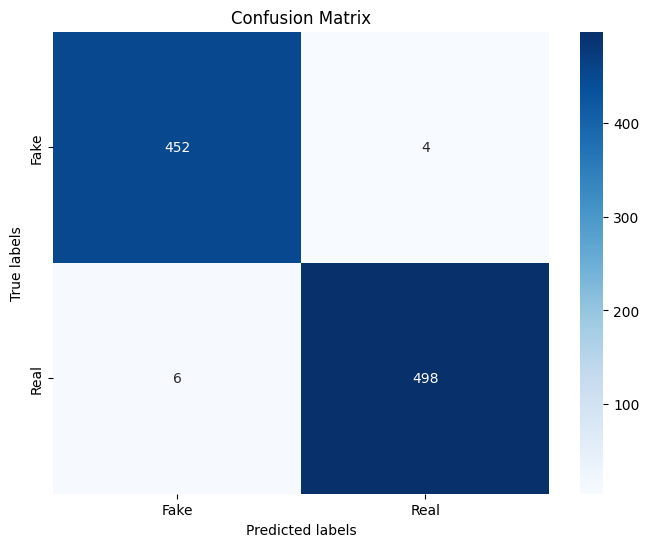

In [ ]:
# Predict probabilities on test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob[:, 1] > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred_binary, target_names=['Fake', 'Real'])

print(report)

'''
              precision    recall  f1-score   support

        Fake       0.97      1.00      0.98       456
        Real       1.00      0.97      0.98       504

    accuracy                           0.98       960
   macro avg       0.98      0.98      0.98       960
weighted avg       0.98      0.98      0.98       960

'''

30/30 [==============================] - 1s 32ms/step
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99       456
        Real       0.99      0.99      0.99       504

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960



'\n              precision    recall  f1-score   support\n\n        Fake       0.97      1.00      0.98       456\n        Real       1.00      0.97      0.98       504\n\n    accuracy                           0.98       960\n   macro avg       0.98      0.98      0.98       960\nweighted avg       0.98      0.98      0.98       960\n\n'

In [ ]:
#4. Tf-Idf + (1,3) N-grams Text Vectorization
text_vectorizer = keras.layers.TextVectorization(max_tokens=50000, standardize="lower_and_strip_punctuation",
                                                 split="whitespace",
                                                 ngrams=(1,3),
                                                 output_mode="tf_idf", pad_to_max_tokens=True)

text_vectorizer.adapt(np.concatenate((X_train, X_test)), batch_size=512)
model = create_model(text_vectorizer)
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_val, y_val),callbacks=[early_stopping])

'''
Epoch 1/10
28/28 [==============================] - 18s 605ms/step - loss: 0.6465 - accuracy: 0.8158 - val_loss: 0.1324 - val_accuracy: 0.9640
Epoch 2/10
28/28 [==============================] - 10s 359ms/step - loss: 0.0492 - accuracy: 0.9954 - val_loss: 0.0897 - val_accuracy: 0.9783
Epoch 3/10
28/28 [==============================] - 8s 294ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9817
Epoch 4/10
28/28 [==============================] - 10s 353ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1989 - val_accuracy: 0.9589
Epoch 5/10
28/28 [==============================] - 10s 368ms/step - loss: 7.5504e-04 - accuracy: 1.0000 - val_loss: 0.1791 - val_accuracy: 0.9680
Epoch 6/10
28/28 [==============================] - 8s 275ms/step - loss: 4.1051e-04 - accuracy: 1.0000 - val_loss: 0.1005 - val_accuracy: 0.9777
Epoch 7/10
28/28 [==============================] - 12s 447ms/step - loss: 4.1854e-04 - accuracy: 1.0000 - val_loss: 0.1250 - val_accuracy: 0.9715
Epoch 8/10
28/28 [==============================] - 8s 288ms/step - loss: 2.1702e-04 - accuracy: 1.0000 - val_loss: 0.1116 - val_accuracy: 0.9789
Epoch 9/10
28/28 [==============================] - 12s 444ms/step - loss: 1.3081e-04 - accuracy: 1.0000 - val_loss: 0.1832 - val_accuracy: 0.9680
Epoch 10/10
28/28 [==============================] - 17s 623ms/step - loss: 9.9585e-05 - accuracy: 1.0000 - val_loss: 0.1752 - val_accuracy: 0.9703

'''

Epoch 1/10
28/28 [==============================] - 21s 568ms/step - loss: 1.6118 - accuracy: 0.6182 - val_loss: 0.3638 - val_accuracy: 0.9498
Epoch 2/10
28/28 [==============================] - 8s 302ms/step - loss: 0.3163 - accuracy: 0.8933 - val_loss: 0.1859 - val_accuracy: 0.9720
Epoch 3/10
28/28 [==============================] - 10s 376ms/step - loss: 0.1714 - accuracy: 0.9613 - val_loss: 0.1103 - val_accuracy: 0.9892
Epoch 4/10
28/28 [==============================] - 10s 365ms/step - loss: 0.0997 - accuracy: 0.9822 - val_loss: 0.0755 - val_accuracy: 0.9909
Epoch 5/10
28/28 [==============================] - 9s 305ms/step - loss: 0.0610 - accuracy: 0.9909 - val_loss: 0.0604 - val_accuracy: 0.9932
Epoch 6/10
28/28 [==============================] - 11s 395ms/step - loss: 0.0440 - accuracy: 0.9947 - val_loss: 0.0428 - val_accuracy: 0.9903
Epoch 7/10
28/28 [==============================] - 8s 302ms/step - loss: 0.0295 - accuracy: 0.9944 - val_loss: 0.0375 - val_accuracy: 0.9903
Ep

'\nEpoch 1/10\n28/28 [==============================] - 18s 605ms/step - loss: 0.6465 - accuracy: 0.8158 - val_loss: 0.1324 - val_accuracy: 0.9640\nEpoch 2/10\n28/28 [==============================] - 10s 359ms/step - loss: 0.0492 - accuracy: 0.9954 - val_loss: 0.0897 - val_accuracy: 0.9783\nEpoch 3/10\n28/28 [==============================] - 8s 294ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9817\nEpoch 4/10\n28/28 [==============================] - 10s 353ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1989 - val_accuracy: 0.9589\nEpoch 5/10\n28/28 [==============================] - 10s 368ms/step - loss: 7.5504e-04 - accuracy: 1.0000 - val_loss: 0.1791 - val_accuracy: 0.9680\nEpoch 6/10\n28/28 [==============================] - 8s 275ms/step - loss: 4.1051e-04 - accuracy: 1.0000 - val_loss: 0.1005 - val_accuracy: 0.9777\nEpoch 7/10\n28/28 [==============================] - 12s 447ms/step - loss: 4.1854e-04 - accuracy: 1.0000 - val_loss: 0.1

30/30 [==============================] - 1s 21ms/step


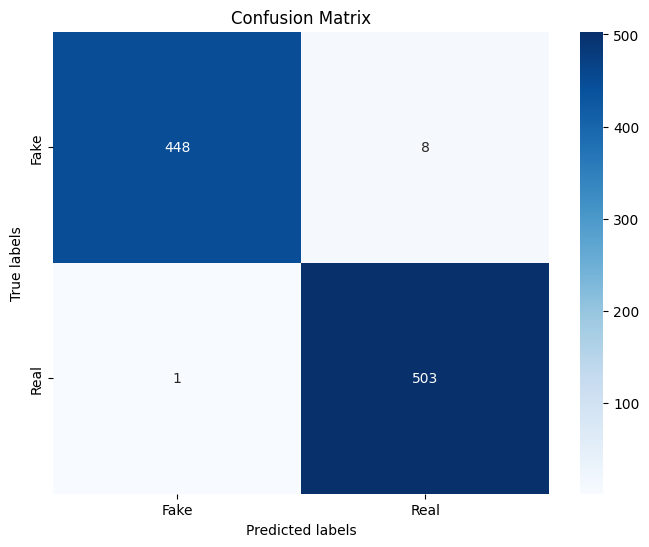

In [ ]:
# Predict probabilities on test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob[:, 1] > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Generate classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_binary, target_names=['Fake', 'Real'])

print(report)

'''
              precision    recall  f1-score   support

        Fake       0.95      0.99      0.97       456
        Real       0.99      0.95      0.97       504

    accuracy                           0.97       960
   macro avg       0.97      0.97      0.97       960
weighted avg       0.97      0.97      0.97       960
'''

30/30 [==============================] - 1s 31ms/step
              precision    recall  f1-score   support

        Fake       1.00      0.98      0.99       456
        Real       0.98      1.00      0.99       504

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960



'\n              precision    recall  f1-score   support\n\n        Fake       0.95      0.99      0.97       456\n        Real       0.99      0.95      0.97       504\n\n    accuracy                           0.97       960\n   macro avg       0.97      0.97      0.97       960\nweighted avg       0.97      0.97      0.97       960\n'

In [ ]:
#5. Scikit-Learn Tf-Idf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = TfidfVectorizer(max_features=50000)
vectorizer.fit(np.concatenate((X_train, X_val)))
X_train_vect = vectorizer.transform(X_train)
X_val_vect = vectorizer.transform(X_val)
X_test_vect = vectorizer.transform(X_test)

X_train_vect = X_train_vect.toarray()
X_val_vect = X_val_vect.toarray()
X_test_vect = X_test_vect.toarray()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model =  Sequential([
                        layers.Input(shape=X_train_vect.shape[1:]),
                        layers.Dense(128, activation="relu"),
                        layers.Dropout(0.5),
                        layers.Dense(64, activation="relu"),
                        layers.Dropout(0.5),
                        layers.Dense(2, activation="softmax"),
                    ])

#model.summary()

In [ ]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train_vect, y_train, batch_size=256, epochs=10, validation_data=(X_val_vect, y_val),callbacks=[early_stopping])
'''
Epoch 1/10
28/28 [==============================] - 11s 347ms/step - loss: 0.5229 - accuracy: 0.8854 - val_loss: 0.2547 - val_accuracy: 0.9675
Epoch 2/10
28/28 [==============================] - 9s 306ms/step - loss: 0.0866 - accuracy: 0.9966 - val_loss: 0.0702 - val_accuracy: 0.9795
Epoch 3/10
28/28 [==============================] - 8s 280ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0541 - val_accuracy: 0.9812
Epoch 4/10
28/28 [==============================] - 9s 313ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9834
Epoch 5/10
28/28 [==============================] - 7s 250ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0481 - val_accuracy: 0.9812
Epoch 6/10
28/28 [==============================] - 12s 452ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0472 - val_accuracy: 0.9812
Epoch 7/10
28/28 [==============================] - 15s 546ms/step - loss: 7.9429e-04 - accuracy: 1.0000 - val_loss: 0.0470 - val_accuracy: 0.9800
Epoch 8/10
28/28 [==============================] - 17s 605ms/step - loss: 5.8422e-04 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 0.9806
Epoch 9/10
28/28 [==============================] - 14s 519ms/step - loss: 4.4340e-04 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9800
Epoch 10/10
28/28 [==============================] - 10s 371ms/step - loss: 3.4482e-04 - accuracy: 1.0000 - val_loss: 0.0465 - val_accuracy: 0.9806

'''

Epoch 1/10
28/28 [==============================] - 12s 384ms/step - loss: 0.5840 - accuracy: 0.7881 - val_loss: 0.3480 - val_accuracy: 0.9612
Epoch 2/10
28/28 [==============================] - 8s 284ms/step - loss: 0.1779 - accuracy: 0.9806 - val_loss: 0.0793 - val_accuracy: 0.9852
Epoch 3/10
28/28 [==============================] - 10s 359ms/step - loss: 0.0317 - accuracy: 0.9973 - val_loss: 0.0420 - val_accuracy: 0.9874
Epoch 4/10
28/28 [==============================] - 7s 255ms/step - loss: 0.0095 - accuracy: 0.9997 - val_loss: 0.0352 - val_accuracy: 0.9897
Epoch 5/10
28/28 [==============================] - 10s 366ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 0.9892
Epoch 6/10
28/28 [==============================] - 8s 275ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0328 - val_accuracy: 0.9886
Epoch 7/10
28/28 [==============================] - 9s 343ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0319 - val_accuracy: 0.9886
Epo

'\nEpoch 1/10\n28/28 [==============================] - 11s 347ms/step - loss: 0.5229 - accuracy: 0.8854 - val_loss: 0.2547 - val_accuracy: 0.9675\nEpoch 2/10\n28/28 [==============================] - 9s 306ms/step - loss: 0.0866 - accuracy: 0.9966 - val_loss: 0.0702 - val_accuracy: 0.9795\nEpoch 3/10\n28/28 [==============================] - 8s 280ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0541 - val_accuracy: 0.9812\nEpoch 4/10\n28/28 [==============================] - 9s 313ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9834\nEpoch 5/10\n28/28 [==============================] - 7s 250ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0481 - val_accuracy: 0.9812\nEpoch 6/10\n28/28 [==============================] - 12s 452ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0472 - val_accuracy: 0.9812\nEpoch 7/10\n28/28 [==============================] - 15s 546ms/step - loss: 7.9429e-04 - accuracy: 1.0000 - val_loss: 0.0470 - val_

30/30 [==============================] - 1s 17ms/step


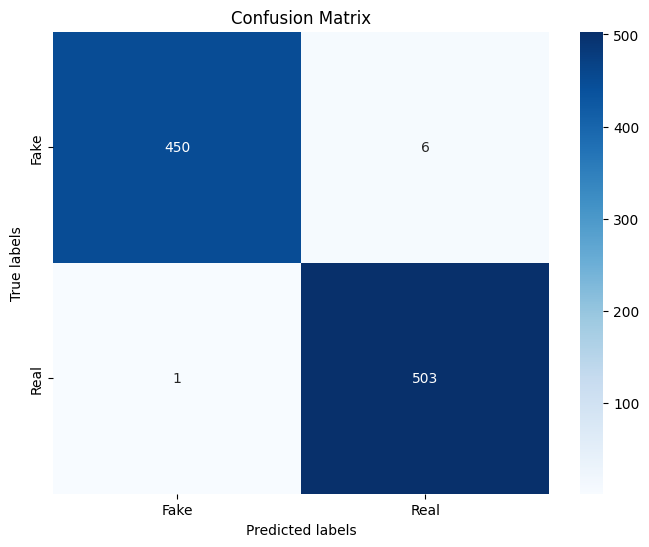

'\n450 6\n5 499\n\n'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict probabilities on test set
y_pred_prob = model.predict(X_test_vect)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob[:, 1] > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

'''
450 6
5 499

'''

In [ ]:
from sklearn.metrics import accuracy_score
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)


# Generate classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_binary, target_names=['Fake', 'Real'])

print(report)
'''
             precision    recall  f1-score   support

        Fake       0.99      0.99      0.99       456
        Real       0.99      0.99      0.99       504

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960


'''

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_5' (type Sequential).
    
    Input 0 of layer "dense_15" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_5' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=False
      • mask=None
